# Análisis de datos Citi Bike System NYC

## Introducción

El sistema de uso compartido de bicicletas en la ciudad de Nueva York (EE.UU.) publica diariamente gran cantidad de datos de actividad sobre su uso.

Estos datos han dado lugar, como no, a algunos [análisis sobre la evolución de este servicio y posibles factores que puedan influenciar su uso](http://toddwschneider.com/posts/a-tale-of-twenty-two-million-citi-bikes-analyzing-the-nyc-bike-share-system/). En esta práctica vamos a proponer el análisis de datos resumen diarios sobre la utilización de este servicio entre julio de 2013 y noviembre de 2015.

La filosofía de esta práctica es que afiancéis los conocimientos adquiridos así como fomentar que consultéis la documentación en línea tanto de Pandas como de Seaborn. De este modo podréis familiarizaros más con los diferentes métodos disponibles para resolver los ejercicios propuestos. En cada pregunta, se ofrecen consejos sobre partes relevantes de esta documentación relacionadas con las tareas que se piden.

## Procedimiento

La presente práctica se realizará de forma **individual**.

## Entrega

El plazo máximo de entrega de esta práctica finalizará el próximo **domingo 12 de Noviembre de 2017**.
La entrega se realizará a través de la plataforma.

## Descripción de los datos

El archivo de datos que vamos a utilizar puede obtenerse de [esta url](https://raw.githubusercontent.com/toddwschneider/nyc-citibike-data/master/data/daily_citi_bike_trip_counts_and_weather.csv). Se trata de un fichero en formato CSV, que se ha creado mezclando [datos del Citi Bike System](https://www.citibikenyc.com/system-data) con [datos de la National Oceanic and Atmospheric Administration (NOAA)](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00094728/detail), sobre NYC. El fichero cuenta con las siguientes columnas:

* *date*: fecha del dato, en formato YYYY-MM-DD.
* *trips*: entero positivo, número total de viajes acumulados ese día.
* *precipitation*: entero positivo, cantidad de lluvia total registrada ese día (pulgadas).
* *snow_depth*: entero positivo, altura de nieve (pulgadas).
* *snowfall*: entero positivo, registro de precipitación en forma de nieve (pulgadas).
* *max_temperature*: entero, temperatura máxima registrada (ºF).
* *min_temperature*: entero, temperatura mínima registrada (ºF).
* *average_wind_speed*: entero, velocidad promedio del viento (MPH, millas por hora).
* *dow*: [0, 7]; código de día de la semana, 0 corresponde al domingo.
* *year*: Año del registro.
* *month*: Mes del registro.
* *holiday*: Valor lógico, indica si esa fecha es festivo (TRUE) o no (FALSE).
* *stations_in_service*: Número de estaciones para tomar o dejar bicicletas que estaban en servicio ese día.
* *weekday*: Valor lógico, indica si esa fecha corresponde a un día entre semana (de lunes a viernes, ambos inclusive).
* *weekday_non_holiday*: Valor lógico, indica si la fecha corresponde a un día entre semana festivo.

Los datos están tomados con frecuencia diaria (filas del archivo).

## Ejercicio 1
#### Valor: 25 puntos

Representa mediante Pandas y Seaborn una serie temporal que muestre la evolución del número total de viajes en Citi Bike cada día, y luego por meses. ¿Se puede observar algún patrón cíclico en esta serie de valores?

**Consejo**: La documentación de la función [`pandas.read_csv(...)`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) indica cómo interpretar directamente el índice temporal de los datos de las series a partir de una de las columnas de los datos. Así, el índice se usa en todas las demás columnas del `DataFrame` de Pandas. No obstante, también se puede resolver el ejercicio creando objetos Pandas de tipo `Series`, a partir de las columnas del `DataFrame` inicial.

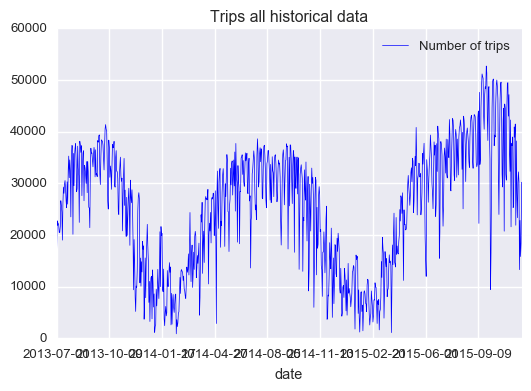

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

#All the historical data,
alldata=pd.read_csv('/Users/javierllorente/Desktop/daily_citi_bike_trip_counts_and_weather.csv',index_col='date',usecols=['date','trips','dow','max_temperature','weekday','weekday_non_holiday'])
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=.95, rc={"lines.linewidth": 0.5})
historicdata=alldata.drop(['dow','max_temperature','weekday','weekday_non_holiday'], axis=1)
ax=historicdata.plot()
ax.legend(['Number of trips'], title='')
ax.set_title("Trips all historical data")

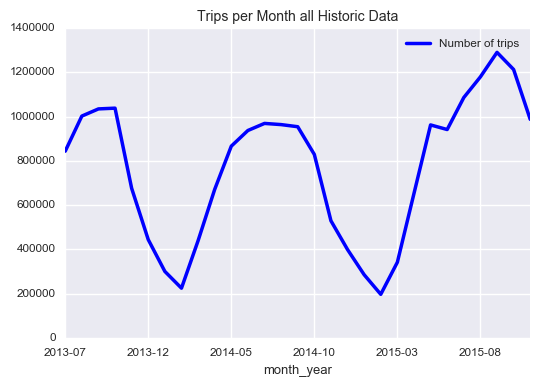

In [2]:
#databymonthhistory
historicdata['month_year']=historicdata.index.map(lambda x:x[0:7])
historicmonthdata=historicdata.groupby('month_year').agg({'trips':['sum']})
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=.85, rc={"lines.linewidth": 2.5})
ax=historicmonthdata.plot()
ax.legend(['Number of trips'], title='')
ax.set_title("Trips per Month all Historic Data")

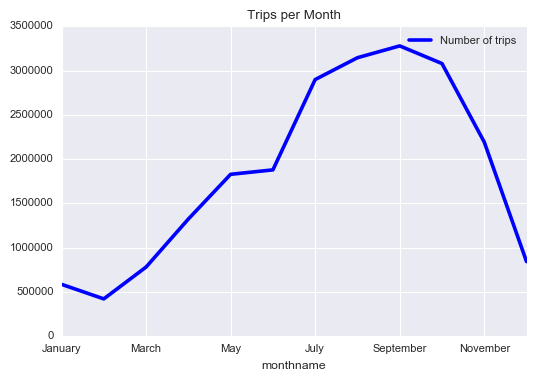

In [3]:
historicdata[(historicdata.index >= '2013-07-01') & (historicdata.index <= '2015-06-30')]
def mapmonth(x):
    x=str(x)
    if x=='01':
        return 'January'
    elif x=='02':
        return 'February'
    elif x=='03':
        return 'March'
    elif x=='04':
        return 'April'
    elif x=='05':
        return 'May'
    elif x=='06':
        return 'June'
    elif x=='07':
        return 'July'
    elif x=='08':
        return 'August'
    elif x=='09':
        return 'September'
    elif x=='10':
        return 'October'
    elif x=='11':
        return 'November'
    elif x=='12':
        return 'December'

historicdata['month']=historicdata['month_year'].map(lambda x:x[-2:])
historicdata['monthname']=historicdata['month'].map(lambda x:mapmonth(x))
monthdata=historicdata.groupby(by=historicdata['monthname']).agg({'trips':['sum']})
new_index=['January','February','March','April','May','June','July',
          'August','September','October','November','December']
monthdata=monthdata.reindex(new_index)
sns.set_style("darkgrid")
sns.set_context("paper", rc={"lines.linewidth": 2.6})
ax=monthdata.plot()
ax.legend(['Number of trips'], title='')
ax.set_title("Trips per Month")

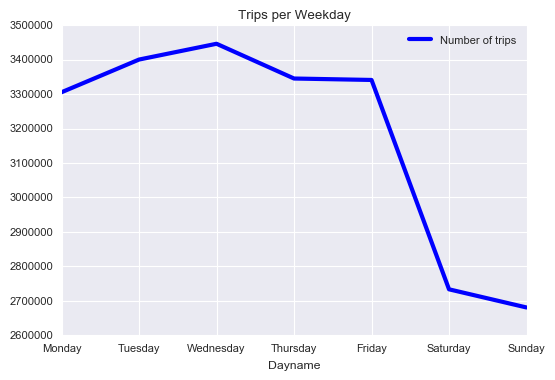

In [4]:
#data by weekday
def mapdow(x):
    if x==0:
        return 'Sunday'
    elif x==1:
        return 'Monday'
    elif x==2:
        return 'Tuesday'
    elif x==3:
        return 'Wednesday'
    elif x==4:
        return 'Thursday'
    elif x==5:
        return 'Friday'
    elif x==6:
        return 'Saturday'
    
alldata['Dayname']=alldata['dow'].map(lambda x:mapdow(x))
dailydata=alldata.drop(['dow','max_temperature','weekday','weekday_non_holiday'], axis=1)
dailydatagroup=dailydata.groupby(by=dailydata['Dayname']).agg({'trips':['sum']})
new_index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dailydataok=dailydatagroup.reindex(new_index)
sns.set_style("darkgrid")
sns.set_context("paper", rc={"lines.linewidth": 3})
ax=dailydataok.plot()
ax.legend(['Number of trips'], title='')
ax.set_title("Trips per Weekday")

In [ ]:
#A la vista de los gráficos podemos observar como a piori existe un aumento de los viajes en bici 
#desde marzo hasta septiembre siendo los meses de verano cuando viajes se realizan probablemente por clima.
#disminuyendo estos trayectos drásticamente a partir del mes de octubre.
#Realizando un analisis semanal observamos otro patron ciclico pues son los días laborables cuando más trayectos,
#se realizan provocandose una disminución durante el fin de semana.

## Ejercicio 2
#### Valor: 30 puntos

Genera un *scatterplot* que represente el número diario de viajes respecto a la temperatura máxima registrada ese día. ¿Se puede observar alguna correlación entre ambas variables? ¿Puedes buscar una métrica de correlación adecuada para cuantificar la relación entre ambas variables?

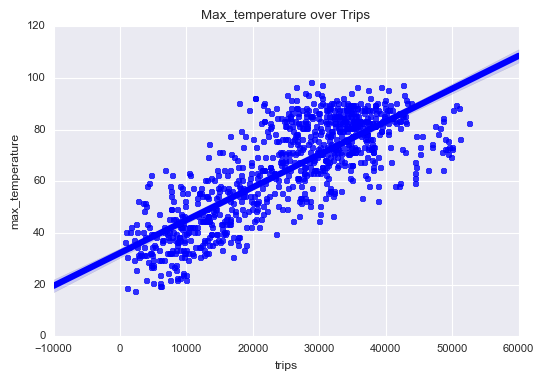

In [5]:
ax=sns.regplot(x='trips', y='max_temperature', marker="+",data=alldata)
ax.set_title("Max_temperature over Trips")
#apriori parece existir una correlación positiva entre las variables

Representa ahora las dos series de valores (viajes diarios y temperatura máxima) conjuntamente en la misma gráfica, con dos subfiguras en vertical dentro de la misma figura. ¿Podemos extraer alguna conclusión adicional sobre la relación entre ambas variables? Calcula la correlación entre ambas series usando una [ventana temporal deslizante de 90 días](http://pandas.pydata.org/pandas-docs/stable/computation.html#window-functions), con los resultados ajustados al centro de cada ventana. ¿Varían de alguna forma nuestras conclusiones?

**Consejo**: Revisa la documentación sobre la función [`pd.Series.rolling(...)`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html), junto con los siguientes enlaces antes de resolver el ejercicio:
1. https://svds.com/avoiding-common-mistakes-with-time-series/
2. https://blog.oraylis.de/2016/03/a-common-pitfall-with-correlations-in-timeseries/

## Ejercicio 3
#### Valor: 20 puntos

Escoja un diagrama adecuado para representar la diferencia de valores entre el número total de viajes registrados en los días laborables y los registrados en días no laborables (fines de semana y festivos entre semana). ¿A qué conclusiones podemos llegar?

**Consejo**: Revisa la documentación de Seaborn sobre [representación gráfica con datos categóricos](http://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial) para resolver el ejercicio.

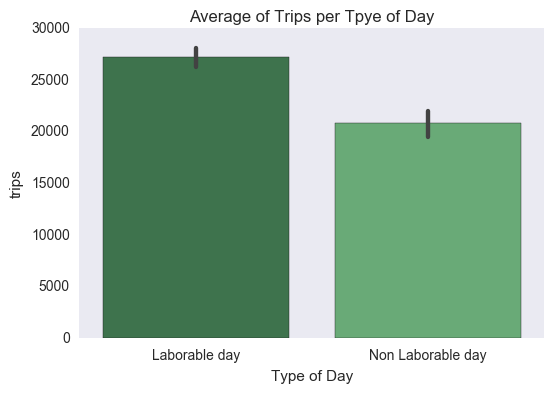

In [6]:
def weekday(x,y):
    if x is True and y is True:
        return 'Laborable day'
    else:
        return 'Non Laborable day'

alldata['Type of Day']=alldata.apply(lambda row: weekday(row['weekday'],row['weekday_non_holiday']),axis=1)
Laborableday=alldata.drop(['dow','weekday','weekday_non_holiday','Dayname','max_temperature'],axis=1)
sns.set(style="dark", color_codes=True)
ax=sns.barplot(x="Type of Day",y="trips", data=Laborableday, palette="Greens_d")
ax.set_title("Average of Trips per Tpye of Day")
#de media nos encontramos con que en los días laborables se realizan alrededor de 7000 viajes más.

## Ejercicio 4
#### Valor: 25 puntos

Usando toda la serie de valores que tenemos disponible, ¿cuál es el día de la semana en que realizan en total más viajes en Citi Bike? ¿Y el que menos? ¿Hay diferencias si desglosamos este gráfico por años?

**Consejo**: Analiza cómo podemos representar gráficos en los que los paneles o ejes tengan en cuenta valores de nuestras variables en el tutorial [*Plotting on data-aware grids*](http://seaborn.pydata.org/tutorial/axis_grids.html) de la documentación de Seaborn.

In [32]:

#vuelvo a usar el código
def mapdow(x):
    if x==0:
        return 'Sun'
    elif x==1:
        return 'Mon'
    elif x==2:
        return 'Tue'
    elif x==3:
        return 'Wed'
    elif x==4:
        return 'Thu'
    elif x==5:
        return 'Fri'
    elif x==6:
        return 'Sat'
    
alldata['Dayname']=alldata['dow'].map(lambda x:mapdow(x))
alldata['Year']=alldata.index.map(lambda x:x[:4])
trips_per_day=alldata.groupby(alldata['Dayname']).agg({'trips':['sum']})
max_trips_day= trips_per_day.loc[trips_per_day['trips'].idxmax()]
print(max_trips_day)
#el dia que más viajes se realizan es el miércoles.
min_trips_day= trips_per_day.loc[trips_per_day['trips'].idxmin()]
print(min_trips_day)
#el dia que menos viajes se realizan es el domingo.

           trips
             sum
Dayname         
Wed      3446195
           trips
             sum
Dayname         
Sun      2680568


(550000, 1500000)

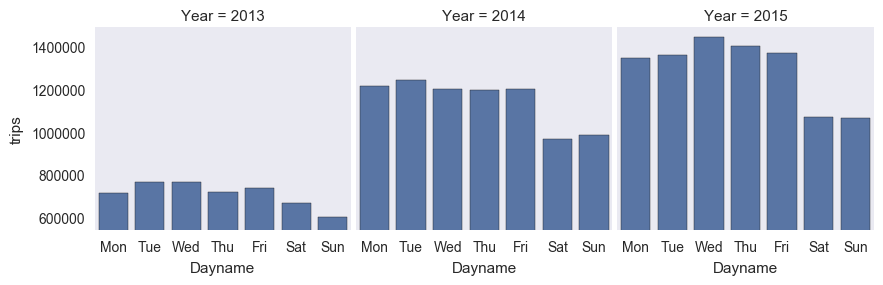

In [50]:

trips_per_day_and_year=alldata.groupby(['Dayname','Year']).agg({'trips':['sum']}).reset_index()
graph=sns.FacetGrid(trips_per_day_and_year, col="Year")
graph.map(sns.barplot,'Dayname','trips',
          order=["Mon", "Tue","Wed","Thu","Fri","Sat","Sun"])
         #linestyles=['--'])
graph.fig.subplots_adjust(wspace=.02, hspace=100000.02)
plt.ylim(550000, 1500000)
sns.set_style("darkgrid")
#año 2013 max -> Miercoles min-> Domingo.
#año 2014 max -> Martes min-> Sabado.
#año 2015 max -> Miercoles min-> Domingo.
